In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from collections import Counter
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Basic structure
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['label'].value_counts())
print("\nClass ratio:\n", df['label'].value_counts(normalize=True))

# Add message length
df['length'] = df['message'].apply(len)

# Summary statistics
print("\nMessage length statistics:\n", df.groupby('label')['length'].describe())



Dataset shape: (5572, 2)

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64

Class ratio:
 label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Message length statistics:
         count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0


/var/folders/4s/mzc5_tjd3954d5s07zw58xk40000gn/T/ipykernel_29276/2894548082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


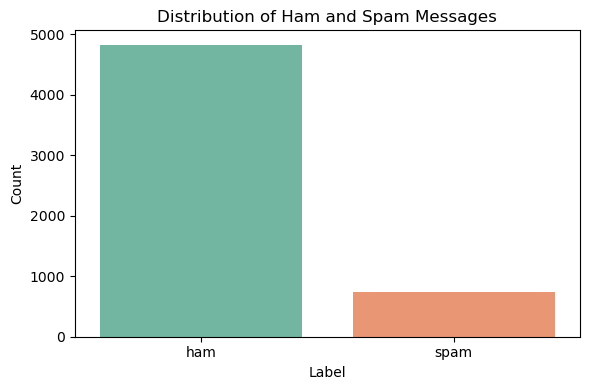

In [31]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/4s/mzc5_tjd3954d5s07zw58xk40000gn/T/ipykernel_29276/3224097052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='length', data=df, palette='Set3')


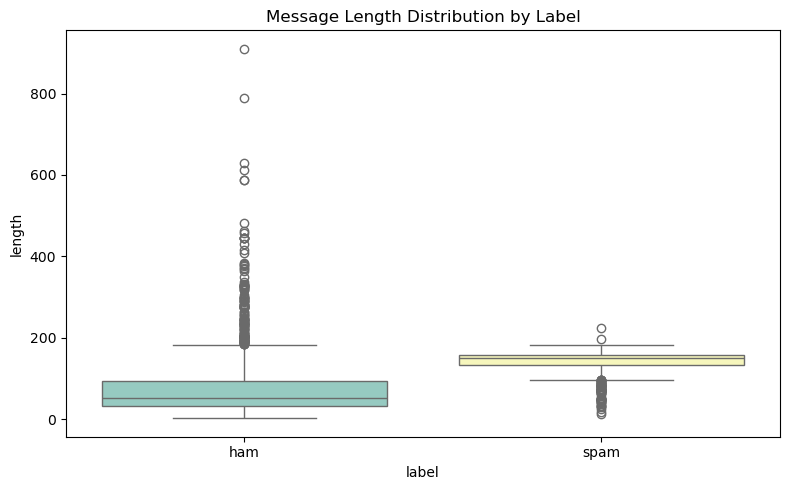

In [33]:
# Visualize message lengths
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='length', data=df, palette='Set3')
plt.title('Message Length Distribution by Label')
plt.tight_layout()
plt.show()

In [35]:
# Text cleaning for word frequency
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean'] = df['message'].apply(clean_text)

# Tokenize and count top words
ham_words = ' '.join(df[df['label'] == 'ham']['clean']).split()
spam_words = ' '.join(df[df['label'] == 'spam']['clean']).split()

ham_freq = Counter(ham_words).most_common(10)
spam_freq = Counter(spam_words).most_common(10)

print("\nTop 10 Ham Words:", ham_freq)
print("Top 10 Spam Words:", spam_freq)


Top 10 Ham Words: [('i', 2195), ('you', 1841), ('to', 1562), ('the', 1130), ('a', 1067), ('u', 1001), ('and', 849), ('in', 817), ('me', 761), ('my', 748)]
Top 10 Spam Words: [('to', 689), ('a', 379), ('call', 349), ('you', 287), ('£', 270), ('your', 263), ('free', 219), ('the', 204), ('for', 203), ('now', 190)]


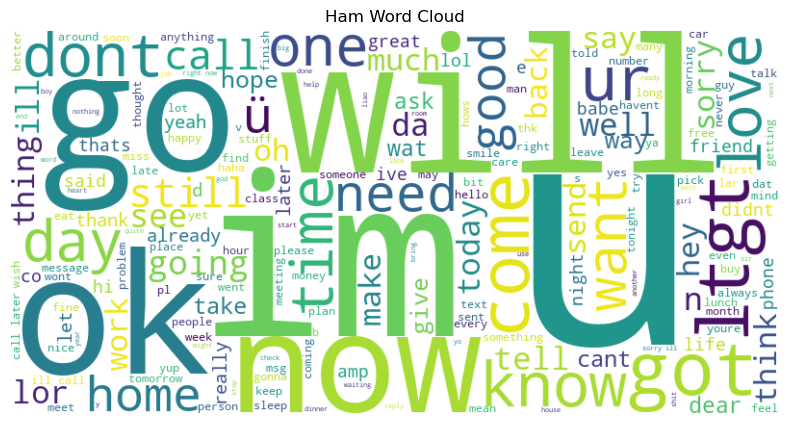

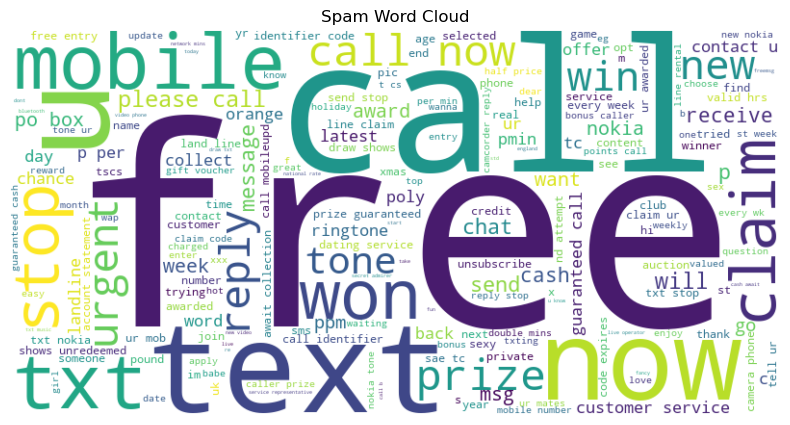

In [37]:
# Word clouds
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_words))
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_words))

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.show()